In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv("/content/Online_Retail.csv",encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [45]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

/tmp/ipython-input-3633860036.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [47]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [48]:
df = df.dropna(subset=['CustomerID','Description'])

In [49]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [51]:
df['Amount'] = df['Quantity'] * df['UnitPrice']

In [52]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [53]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [54]:
country_revenue = df.groupby('Country')['Amount'].sum().reset_index().sort_values(by='Amount',ascending=False)

In [55]:
country_revenue

,Country,Amount
35,United Kingdom,6767873.394
23,Netherlands,284661.540
10,EIRE,250285.220
14,Germany,221698.210
13,France,196712.840
0,Australia,137077.270
32,Switzerland,55739.400
30,Spain,54774.580
3,Belgium,40910.960
31,Sweden,36595.910


In [56]:
product_revenue = df.groupby('Description')['Amount'].sum().reset_index().sort_values(by='Amount',ascending=False)

In [57]:
product_revenue.head(20)

,Description,Amount
2780,REGENCY CAKESTAND 3 TIER,132870.40
3716,WHITE HANGING HEART T-LIGHT HOLDER,93823.85
1771,JUMBO BAG RED RETROSPOT,83236.76
2355,PARTY BUNTING,67687.53
2624,POSTAGE,66710.24
217,ASSORTED COLOUR BIRD ORNAMENT,56499.22
2669,RABBIT NIGHT LIGHT,51137.80
725,CHILLI LIGHTS,45936.81
2323,PAPER CHAIN KIT 50'S CHRISTMAS,41500.48
2405,PICNIC BASKET WICKER 60 PIECES,39619.50


In [58]:
product_qty = df.groupby('Description')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)

In [59]:
product_qty.head(20)

,Description,Quantity
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
1771,JUMBO BAG RED RETROSPOT,45066
217,ASSORTED COLOUR BIRD ORNAMENT,35314
3716,WHITE HANGING HEART T-LIGHT HOLDER,34147
2279,PACK OF 72 RETROSPOT CAKE CASES,33409
2612,POPCORN HOLDER,30504
2669,RABBIT NIGHT LIGHT,27094
2057,MINI PAINT SET VINTAGE,25880
2245,PACK OF 12 LONDON TISSUES,25321
2277,PACK OF 60 PINK PAISLEY CAKE CASES,24163


In [60]:
monthly_sales = df.set_index('InvoiceDate').resample('M')['Amount'].sum().reset_index()

/tmp/ipython-input-215731813.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('InvoiceDate').resample('M')['Amount'].sum().reset_index()


In [61]:
monthly_sales

,InvoiceDate,Amount
0,2010-12-31,554604.020
1,2011-01-31,475074.380
2,2011-02-28,436546.150
3,2011-03-31,579964.610
4,2011-04-30,426047.851
5,2011-05-31,648251.080
6,2011-06-30,608013.160
7,2011-07-31,574238.481
8,2011-08-31,616368.000
9,2011-09-30,931440.372


In [62]:
unique_product = df[['StockCode','Description','UnitPrice']].drop_duplicates().set_index('StockCode')

In [63]:
unique_product

,Description,UnitPrice
StockCode,,
85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
71053,WHITE METAL LANTERN,3.39
84406B,CREAM CUPID HEARTS COAT HANGER,2.75
84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39
84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39
...,...,...
23526,WALL ART DOG LICENCE,3.90
21253,SET OF PICTURE FRAME STICKERS,0.79
23843,"PAPER CRAFT , LITTLE BIRDIE",2.08


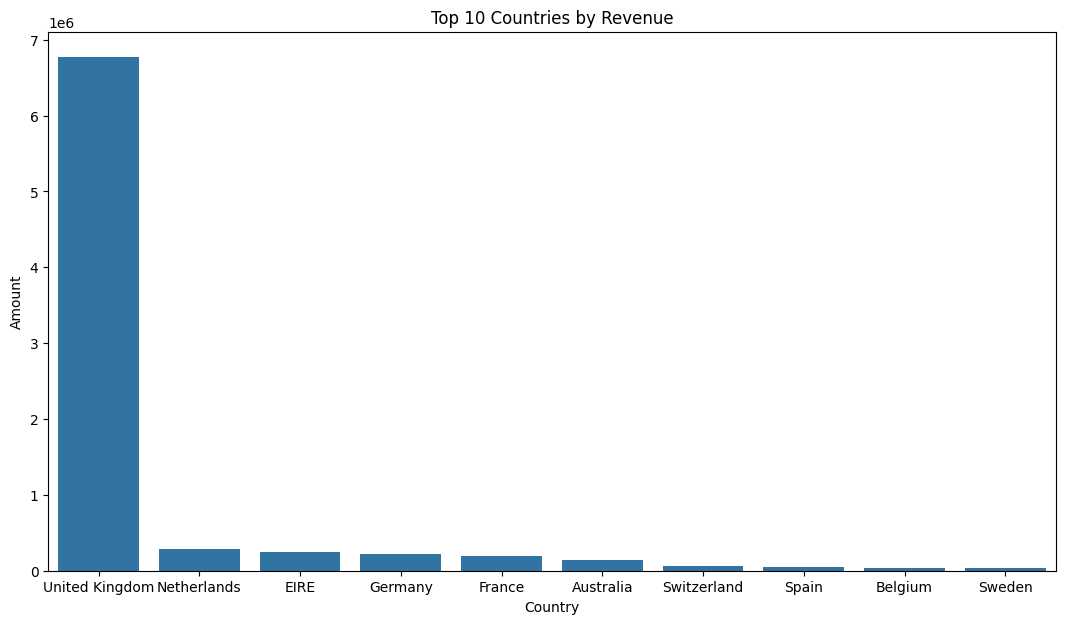

In [69]:
plt.figure(figsize=(13,7))
sns.barplot(x='Country', y='Amount', data=country_revenue.head(10))
plt.title('Top 10 Countries by Revenue')
plt.show()

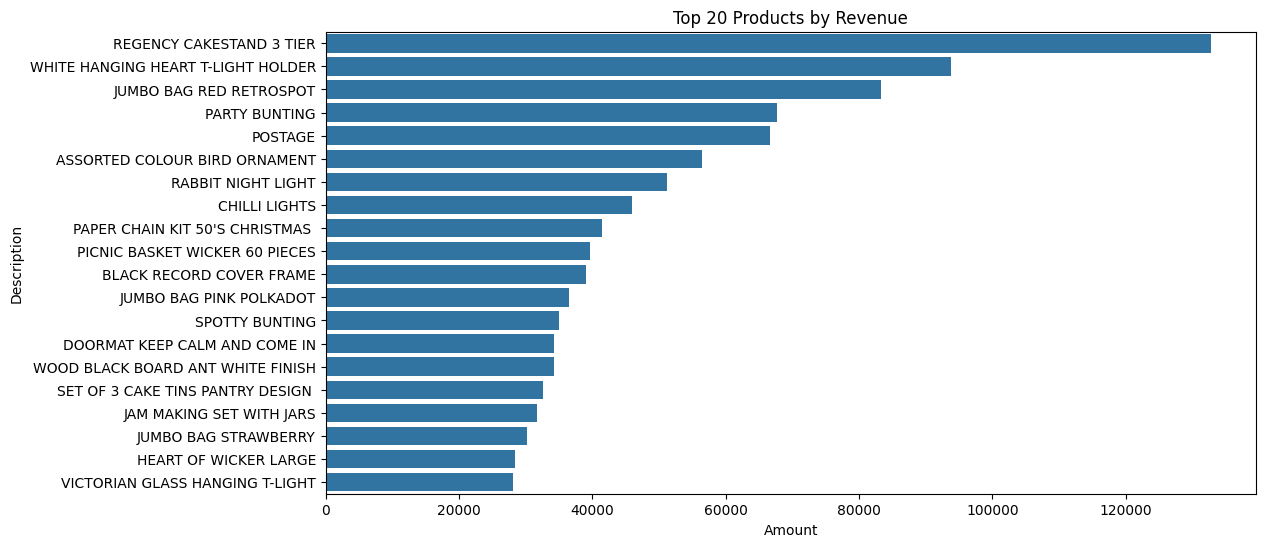

In [71]:
plt.figure(figsize=(12,6))
sns.barplot(x='Amount', y='Description', data=product_revenue.head(20))
plt.title('Top 20 Products by Revenue')
plt.show()

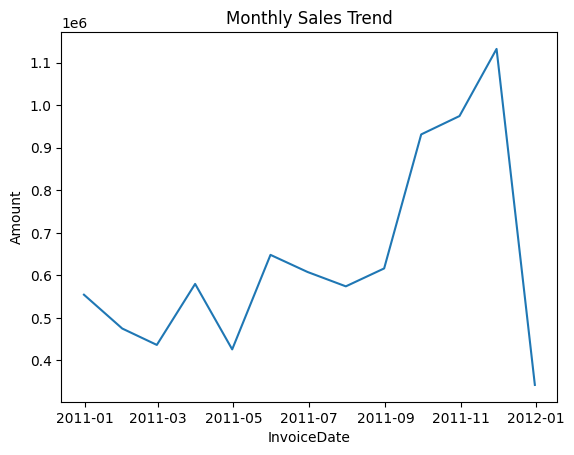

In [72]:
sns.lineplot(x='InvoiceDate', y='Amount', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.show()

Task 1: Top 10 customers by revenue

In [75]:
top_10_customers = df.groupby('CustomerID')['Amount'].sum().reset_index().sort_values(by='Amount',ascending=False).head(10)

In [76]:
top_10_customers

,CustomerID,Amount
1703,14646.0,279489.02
4233,18102.0,256438.49
3758,17450.0,187482.17
1895,14911.0,132572.62
55,12415.0,123725.45
1345,14156.0,113384.14
3801,17511.0,88125.38
3202,16684.0,65892.08
1005,13694.0,62653.10
2192,15311.0,59419.34


Task 2: Top 5 countries revenue share

In [77]:
top_5_countries = df.groupby('Country')['Amount'].sum().reset_index().sort_values(by='Amount',ascending=False).head(5)

In [79]:
top_5_countries

,Country,Amount
35,United Kingdom,6767873.394
23,Netherlands,284661.540
10,EIRE,250285.220
14,Germany,221698.210
13,France,196712.840


Task 3: Products with high quantity but low revenue

In [82]:
product_high_qty_low_revenue = df.groupby('Description')[['Quantity','Amount']].sum().reset_index().sort_values(by=['Quantity','Amount'],ascending=[False,True])

In [83]:
product_high_qty_low_revenue

,Description,Quantity,Amount
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215,13332.33
1771,JUMBO BAG RED RETROSPOT,45066,83236.76
217,ASSORTED COLOUR BIRD ORNAMENT,35314,56499.22
3716,WHITE HANGING HEART T-LIGHT HOLDER,34147,93823.85
2279,PACK OF 72 RETROSPOT CAKE CASES,33409,16247.95
...,...,...,...
2537,PINK POODLE HANGING DECORATION,-12,-4.56
882,CRUK Commission,-16,-7933.43
245,ASSORTED TUTTI FRUTTI ROUND BOX,-24,-39.60
1066,Discount,-1194,-5696.22


Task 4: Plot monthly sales trend and comment

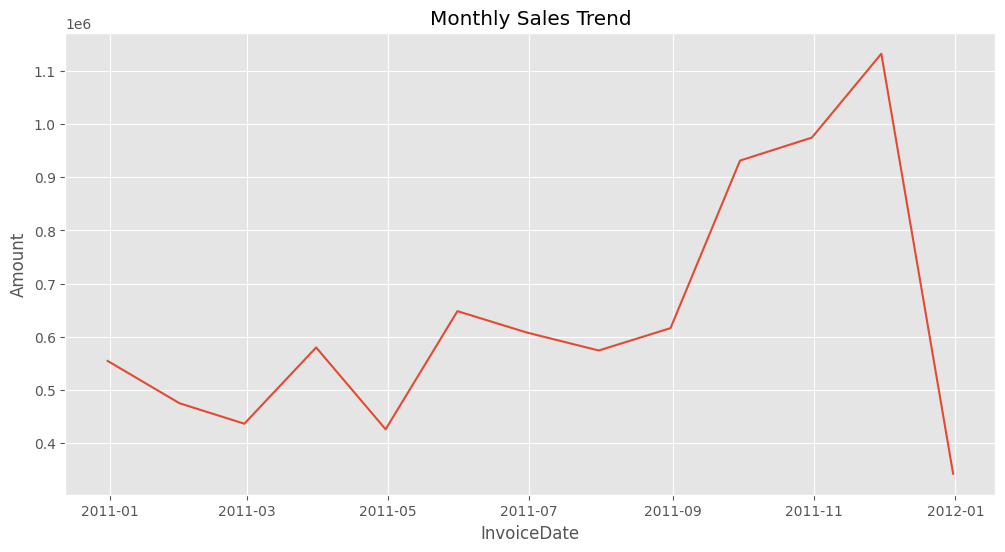

In [86]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.lineplot(x='InvoiceDate', y='Amount', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.show()